##### Use AustraliaFiltered.xlsx dataset generated earlier.

- Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
- Find total immigrants from each category by area name and plot barchart for each area
- Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
- Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
- Plot Total Immigrants based on DevelopmenRegion 

  
- Plot immigration trend for India using line plot
- Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
- For the above use area plot with alpha = 0.5


- Compare Immigration Trend for top-5 countires using stacked area plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('AustraliaFiltered.xlsx')
df.head()

,Unnamed: 0,Country,AreaName,Region,DevName,1980.0,1981.0,1982.0,1983.0,1984.0,...,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,Total
0,244,Afghanistan,Asia,Southern Asia,Developing regions,10,20,30,30,70,...,100,20,40,70,80,110,180,140,560,4630
1,245,Albania,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,110,110,200,250,140,130,110,110,140,1910
2,246,Algeria,Africa,Northern Africa,Developing regions,10,50,30,10,20,...,20,30,60,20,20,50,30,30,60,730
3,247,American Samoa,Oceania,Polynesia,Developing regions,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,30
4,248,Andorra,Europe,Southern Europe,Developed regions,0,0,10,0,0,...,0,10,10,0,10,10,0,10,10,100


In [3]:
print(dir(pd))

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_lib', '_libs', '_np_version_under1p14', '_np_version_under1p15', '_np_version_under1p16', '_np_version_under1p17', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array

<Figure size 432x288 with 0 Axes>

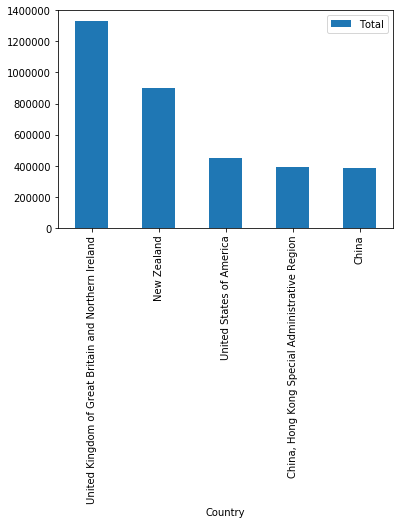

In [4]:
# Plot bar chart of total no of immigrants for countires top 5 countires having max no of total immigrants
plt.figure()
max_df=df.sort_values(by='Total',ascending=False).head()
max_df.plot(x='Country',y='Total',kind='bar')


AreaName
Africa                              354440
Asia                               3463640
Europe                             2166780
Latin America and the Caribbean     120350
Northern America                    592060
Oceania                            1126180
Name: Total, dtype: int64


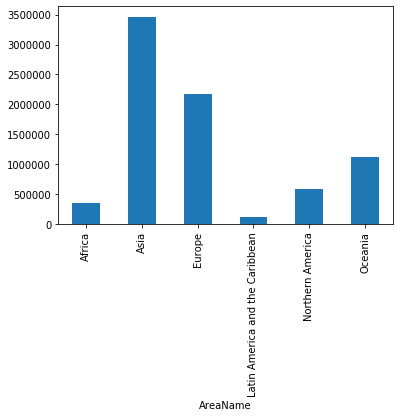

In [5]:
# Find total immigrants from each category by area name and plot barchart for each area

grp_Area=df.groupby(['AreaName'])['Total'].sum()
print(grp_Area)
grp_Area.plot(kind='bar')

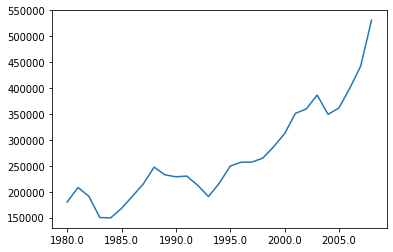

In [6]:
# Plot total immigration trend(immigration of world over the years i.e. year vs Total count for that year) using line plot.
yr_df=df.loc[:,'1980.0':'2008.0'].sum()
yr_df.plot.line()

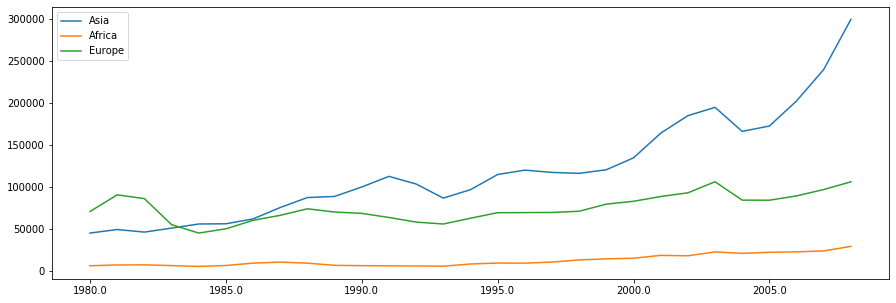

In [7]:
# Compare Immigration Trend for Asia, Africa and Europe AreaName (Use Line plot).
plt.figure(figsize=(15,5))
asia_df=df[df['AreaName']=='Asia'].loc[:,'1980.0':'2008.0'].sum()
asia_df.plot.line(label='asia')

africa_df=df[df['AreaName']=='Africa'].loc[:,'1980.0':'2008.0'].sum()
africa_df.plot.line()
euro_df=df[df['AreaName']=='Europe'].loc[:,'1980.0':'2008.0'].sum()
euro_df.plot.line()
plt.legend(['Asia','Africa','Europe'])

DevName
Developed regions     3927800
Developing regions    3895650
Name: Total, dtype: int64


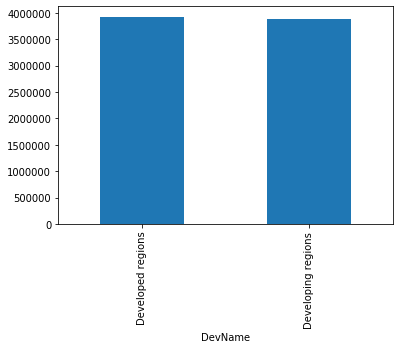

In [8]:
# Plot Total Immigrants based on DevelopmenRegion

grp_dev=df.groupby(['DevName'])['Total'].sum()
print(grp_dev)
grp_dev.plot(kind='bar')


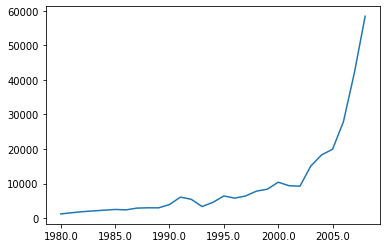

In [9]:
# Plot immigration trend for India using line plot
ind_df=df[df['Country']=='India'].loc[:,'1980.0':'2008.0'].sum()
ind_df.plot.line()

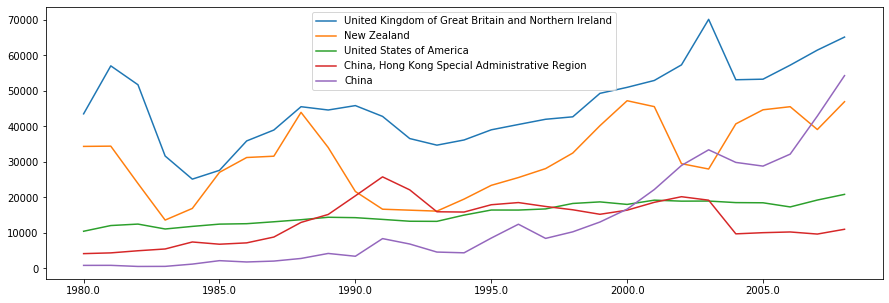

['United Kingdom of Great Britain and Northern Ireland', 'New Zealand', 'United States of America', 'China, Hong Kong Special Administrative Region', 'China']


In [10]:
# Plot immigration Trend(year vs count) for the coutries with top 5 total immigrants. Use Line plot
plt.figure(figsize=(15,5))
top_ctry=list(df.sort_values('Total',ascending=False).head()['Country'])
lists=[df[df['Country']==ctry].loc[:,'1980.0':'2008.0'].sum() for ctry in top_ctry]
[i.plot() for i in lists]
plt.legend(top_ctry)
plt.show()
print(top_ctry)


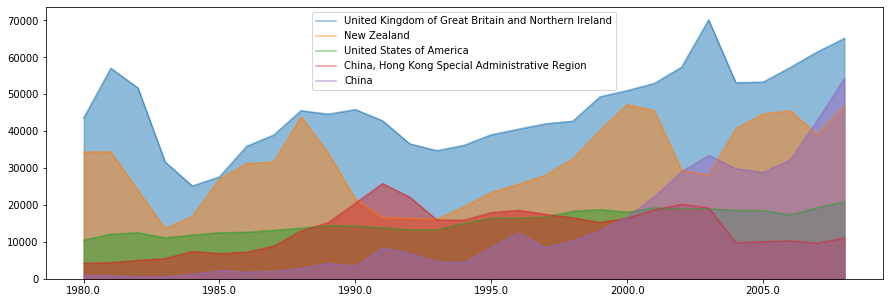

In [11]:
# For the above use area plot with alpha = 0.5
plt.figure(figsize=(15,5))
[i.plot(kind='area',alpha=0.5,stacked=False) for i in lists]

plt.legend(top_ctry)
plt.show()


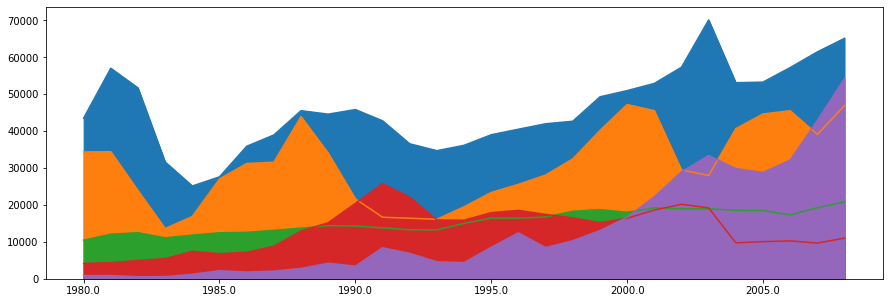

In [12]:
# Compare Immigration Trend for top-5 countires using stacked area plot
plt.figure(figsize=(15,5))
[i.plot(kind='area',stacked=True) for i in lists]
plt.show()